# Breast Cancer Coimbra Data Set

The dataset was obtainded from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra


Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.


Attribute Information:

Quantitative Attributes:
* Age (years)
* BMI (kg/m2)
* Glucose (mg/dL)
* Insulin (µU/mL)
* HOMA
* Leptin (ng/mL)
* Adiponectin (µg/mL)
* Resistin (ng/mL)
* MCP-1(pg/dL)

Labels:

1=Healthy controls

2=Patients



## Objectives

All the relevant information about the data is described above. For more information about the columns information just click on the link and read the description.

Having chosen the data it's time to define the objectives, wich are very simple:
* Do summary statistics on the patients data
* Check for missing values (and address them)
* Create a supervised machine learning model to predict the presence or absence of breast cancer

### Load the libraries
First we will need to load the necessary libraries to analyse the data and create the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data
Next we will import the data that is in a `.csv` file named `dataR2.csv`, and will be named `cancer_data`.

In [2]:
cancer_data = pd.read_csv("dataR2.csv")

print(cancer_data.head())
print("\n", cancer_data.columns)
print("\n", len(cancer_data))
print("\n", cancer_data.dtypes)

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  

 Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

 116

 Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Re

## Summary statistic

In order to better inspect the influence of some factors we will create some plot and obtain some statistiscs on the columns.

The last column (`Classification`) indicates if the patient has cancer (1) or if it's from the control group (2). This column will be used to separate the dataset into to two, making it easier to see the distributions.

In [3]:
cancer = cancer_data[cancer_data["Classification"] == 1].reset_index()
no_cancer = cancer_data[cancer_data["Classification"] == 2].reset_index()

print(cancer.head())
print("\n", no_cancer.head())

   index  Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0      0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1      1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2      2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3      3   68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4      4   86  21.111111       92    3.549  0.805386   6.6994     4.819240   

   Resistin    MCP.1  Classification  
0   7.99585  417.114               1  
1   4.06405  468.786               1  
2   9.27715  554.697               1  
3  12.76600  928.220               1  
4  10.57635  773.920               1  

    index  Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     52   45  21.303949      102   13.852  3.485163   7.6476    21.056625   
1     53   45  20.829995       74    4.560  0.832352   7.7529     8.237405   
2     54   49  20.956608       94   12.305  2.853119  11.2406

### Distributions

First let's see the distribution of the variables on the `cancer` dataframe:
* Histograms
* Boxplots
* Means
* Medians
* Standard deviations

In [4]:
#Means, medians and standard deviations
def summary(data):
    for i in range(1, len(data.columns) - 1):
        mean = np.mean(data[data.columns[i]])
        median = np.median(data[data.columns[i]])
        std = np.std(np.array([data[data.columns[i]]]))
        print("{0} mean: {1}".format(data.columns[i], mean))
        print("{0} median: {1}".format(data.columns[i], median))
        print("{0} standard deviation: {1}\n".format(data.columns[i], std))
        
summary(cancer)

Age mean: 58.07692307692308
Age median: 65.0
Age standard deviation: 18.77482577389832

BMI mean: 28.317336260576916
BMI median: 27.694389065
BMI standard deviation: 5.375024619923628

Glucose mean: 88.23076923076923
Glucose median: 87.0
Glucose standard deviation: 10.093058133450294

Insulin mean: 6.9337692307692285
Insulin median: 5.4835
Insulin standard deviation: 4.812837131509633

HOMA mean: 1.5523977114999998
HOMA median: 1.139682633
HOMA standard deviation: 1.206485234969583

Leptin mean: 26.63793269230769
Leptin median: 21.49485
Leptin standard deviation: 19.147885457384678

Adiponectin mean: 10.328205096153848
Adiponectin median: 8.127775
Adiponectin standard deviation: 7.557546798529974

Resistin mean: 11.614813461538464
Resistin median: 8.92919
Resistin standard deviation: 11.336450908185483

MCP.1 mean: 499.7306923076924
MCP.1 median: 471.3225
MCP.1 standard deviation: 289.41849477447136



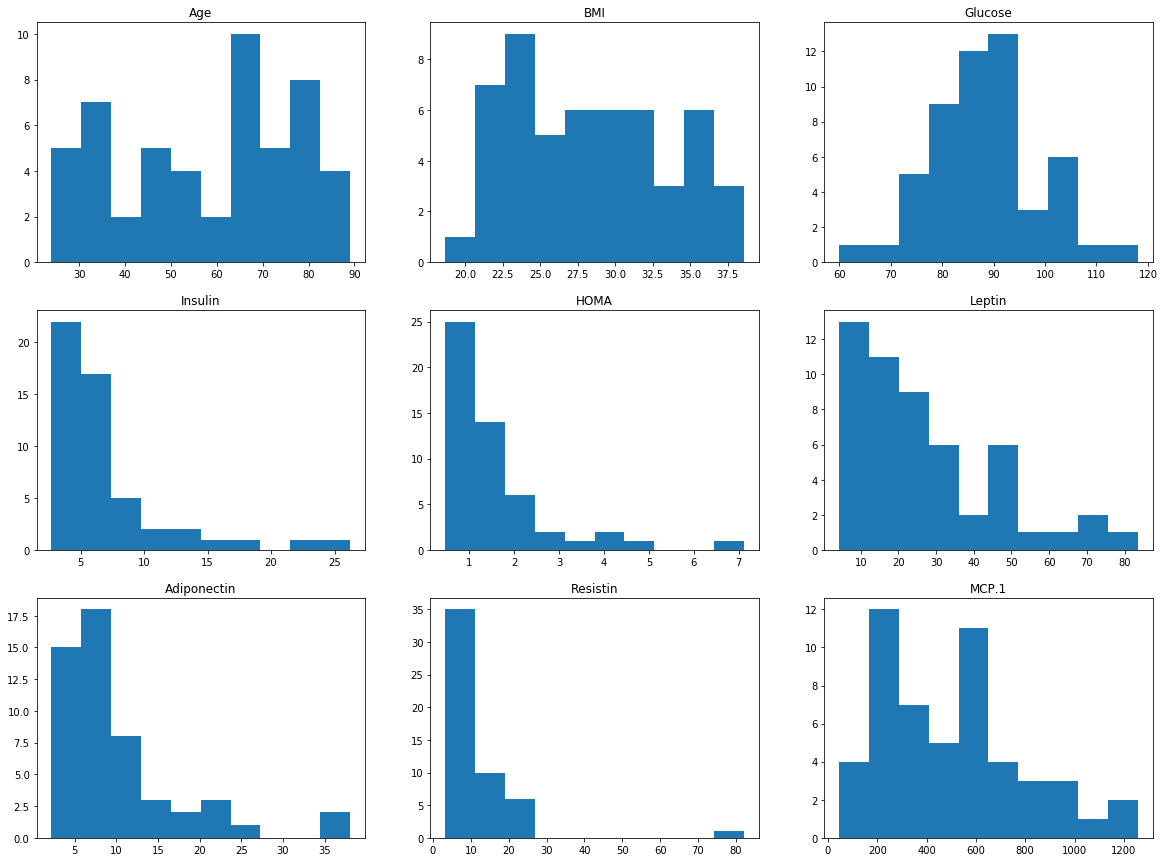

In [5]:
#histograms
def histogram_dist(data):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(data.columns) - 1):
        ax = plt.subplot(3, 3, i)
        plt.hist(data[data.columns[i]])
        plt.title(data.columns[i])
        
histogram_dist(cancer)

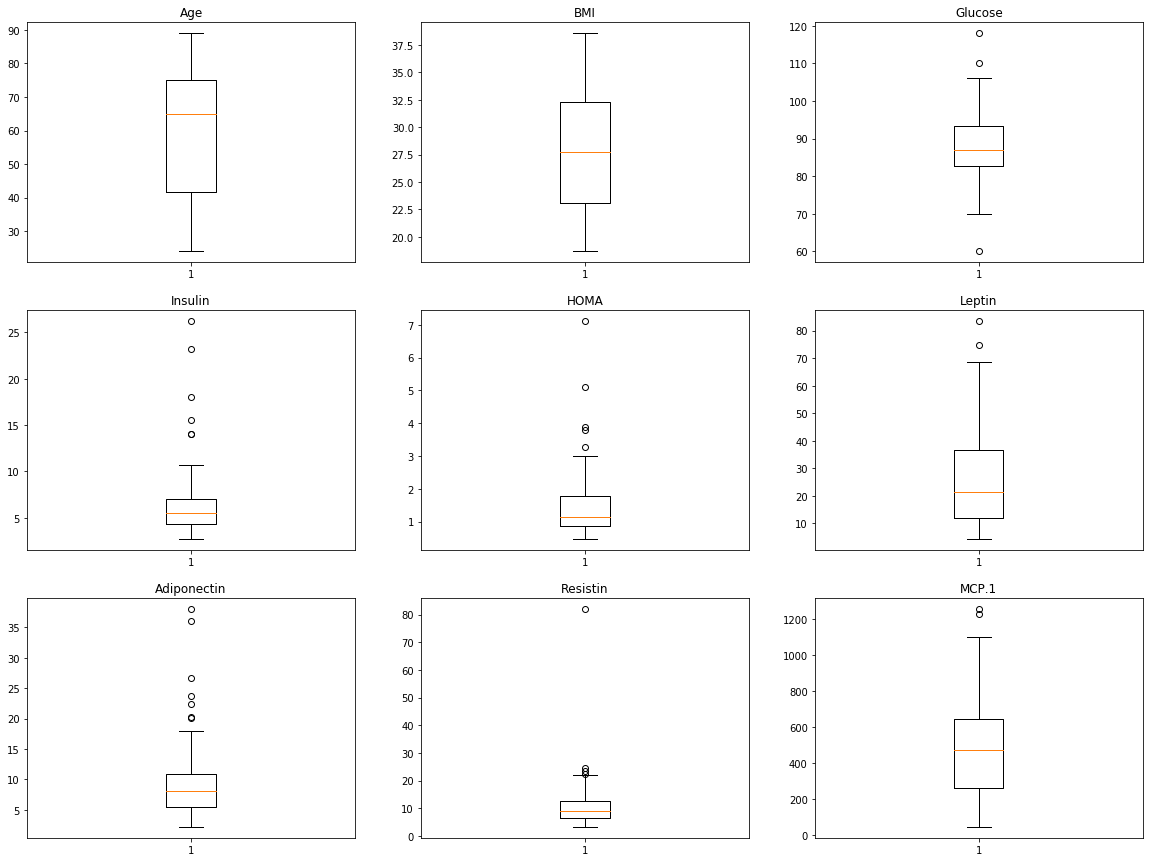

In [6]:
#boxplots
def box_dist(data):
    plt.figure(figsize = (20, 15))
    for i in range(1, len(data.columns) - 1):
        ax = plt.subplot(3, 3, i)
        plt.boxplot(data[data.columns[i]])
        plt.title(data.columns[i])
        
box_dist(cancer)

 
We've seen the distributions in the `cancer` dataframe,, now let's see them on the `no_cancer` dataframe.

In [7]:
#Means, medians and standard deviations
summary(no_cancer)

Age mean: 56.671875
Age median: 53.0
Age standard deviation: 13.387324564093268

BMI mean: 26.984740162968745
BMI median: 27.40802721
BMI standard deviation: 4.584159297412005

Glucose mean: 105.5625
Glucose median: 98.5
Glucose standard deviation: 26.349143131229145

Insulin mean: 12.513218749999995
Insulin median: 7.58
Insulin standard deviation: 12.221127003406783

HOMA mean: 3.623341819874999
HOMA median: 2.052255567
HOMA standard deviation: 4.552950674979439

Leptin mean: 26.5965125
Leptin median: 18.877650000000003
Leptin standard deviation: 19.061762521771332

Adiponectin mean: 10.061167421874998
Adiponectin median: 8.4464375
Adiponectin standard deviation: 6.14092001119501

Resistin mean: 17.2537771875
Resistin median: 14.371825
Resistin standard deviation: 12.537864033726681

MCP.1 mean: 563.0165000000001
MCP.1 median: 465.374
MCP.1 standard deviation: 380.9897981496273



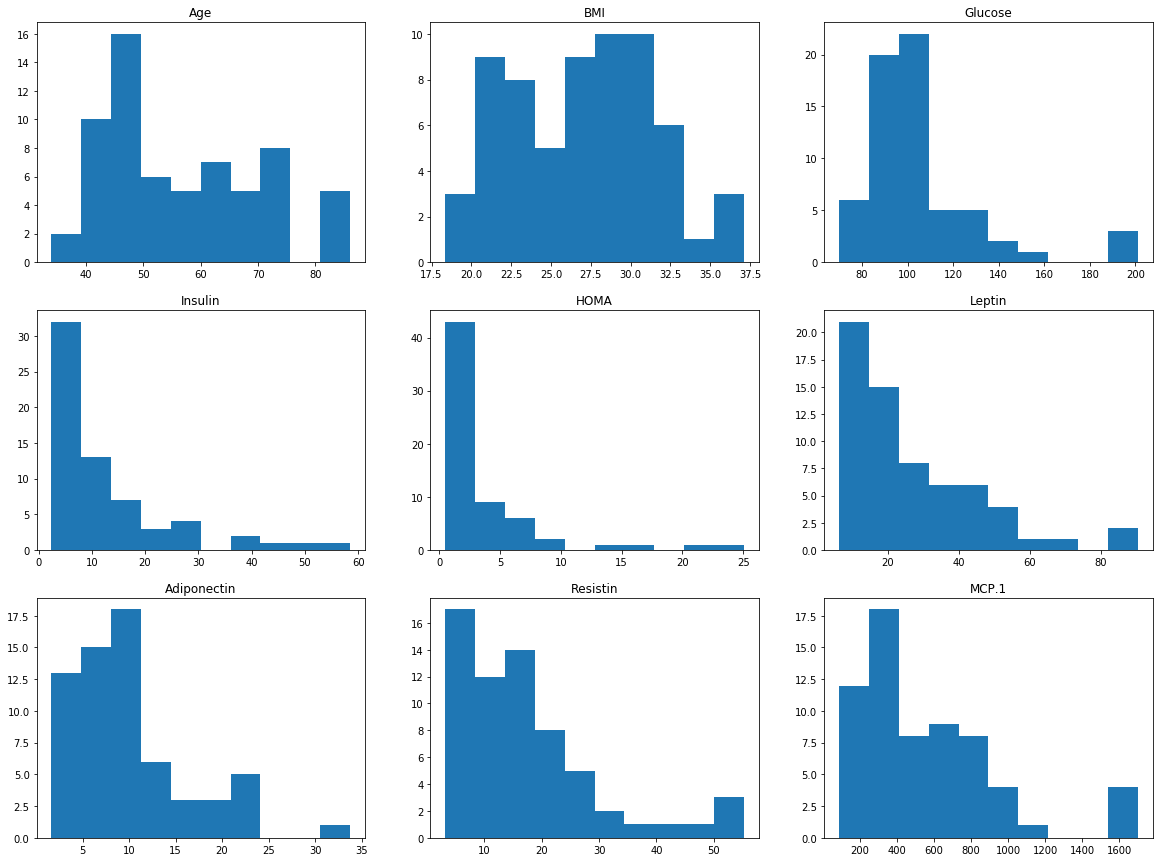

In [8]:
#histograms
histogram_dist(no_cancer)

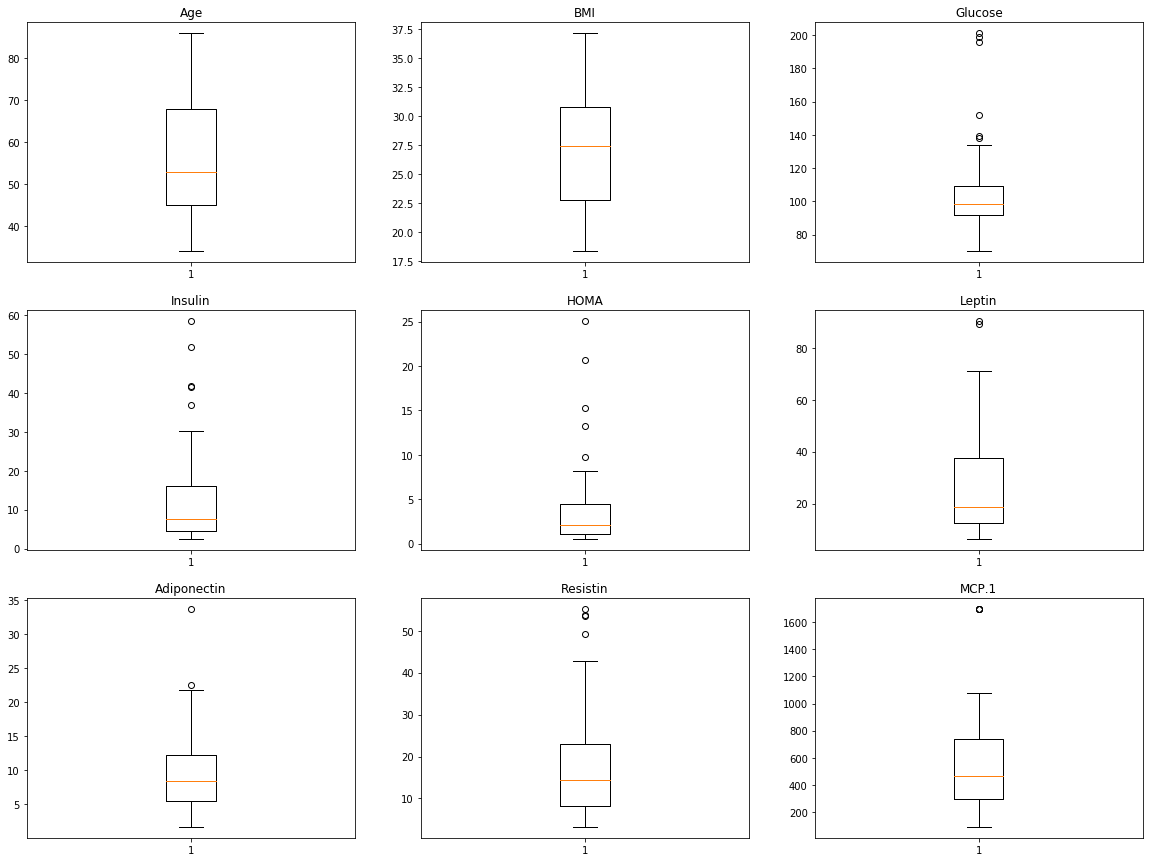

In [9]:
#boxplots
box_dist(no_cancer)

 
In order to see if there is a significant diferent between the two dataframes we will plot the vatiables of each one in the same plot.

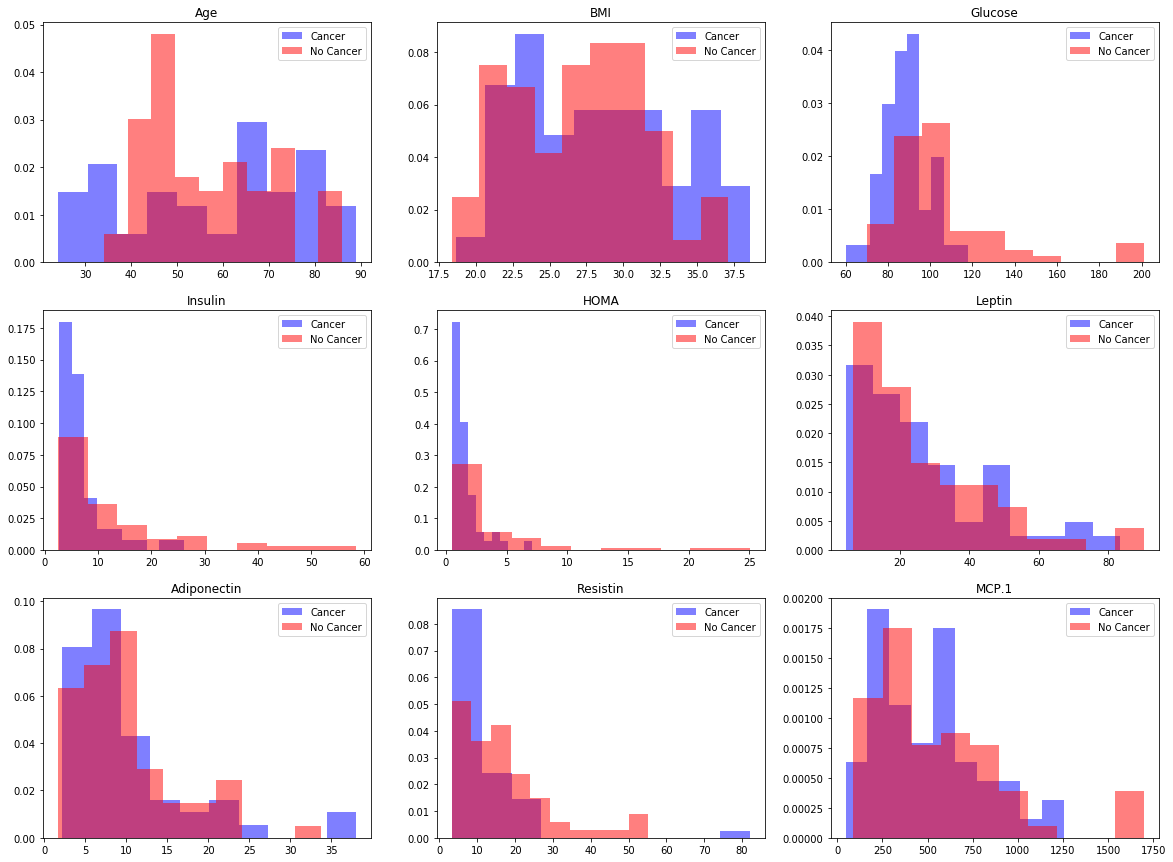

In [10]:
plt.figure(figsize = (20, 15))
for i in range(1, len(cancer.columns) - 1):
    ax = plt.subplot(3, 3, i)
    plt.hist(cancer[cancer.columns[i]], color = "blue", alpha = 0.5, density = True)
    plt.hist(no_cancer[no_cancer.columns[i]], color = "red", alpha = 0.5, density = True)
    plt.title(cancer.columns[i])
    plt.legend(["Cancer", "No Cancer"])

 
Acordingly with the histograms it seems that the variables with the most amount of influence are:
* Glucose
* Insulin
* HOMA
* Resistin

But when reading the information about the dataset, it is said that these are all predictors of breast cancer, so in order to truly evaluate the weight of the rest of the variables, two supervised machine learning models and two unsupervised machine learning models will be created, one with all the variables and one with only the four variables selected above.

The precision of both models will be compared.

## Prediction models

The final steps of this project is the creation of prediction models, so in order to make it more interesting it will be divided in three:
* First create the supervised models
* Secondly create an unsupervised model
* Lastly compare the best supervised model with the unsupervised model and check wich one is the best and the precision difference

### More data manipulation

Before diving into the models let´s do some more manipulation on the data, meaning, checking if it exists empty values.

In [11]:
for column in cancer_data.columns:
    values = cancer_data[column].unique()
    print(column + ":")
    print(values)
    if None in values:
        print("Empty values present")

Age:
[48 83 82 68 86 49 89 76 73 75 34 29 25 24 38 44 47 61 64 32 36 35 54 45
 50 66 53 28 43 51 67 69 60 77 71 78 85 42 62 59 46 72 55 41 81 65 58 40
 52 74 57]
BMI:
[23.5        20.69049454 23.12467037 21.36752137 21.11111111 22.85445769
 22.7        23.8        22.         23.         21.47       23.01
 22.86       18.67       23.34       20.76       22.03       32.03895937
 34.5297228  36.51263743 28.57667585 31.97501487 32.27078777 30.27681661
 30.48315806 37.03560819 38.57875854 31.44654088 35.2507611  34.17489
 36.21227888 36.7901662  35.85581466 34.42217362 27.68877813 29.60676726
 31.2385898  35.09270153 26.34929208 35.58792924 29.2184076  27.2
 27.3        32.5        30.3        27.7        25.7        25.3
 29.4        26.6        27.1        25.9        21.30394858 20.82999519
 20.9566075  24.24242424 21.35991456 21.08281329 19.13265306 22.65625
 22.4996371  21.51385851 22.89281998 22.83287935 23.14049587 24.21875
 22.22222222 20.83       19.56       20.26       24.74     


The dataset is good and it has no missing values.

Now it's time to normalize the data, the reason is that the variables have very different scales wich means that all of them have different weights.

Looking at the boxplots of the data it's clear to see that there are some outliers, so the immediat though is to use Z_Score Normalization, but checking the standard deviation values it pops out the one from the variable `MCP.1`, wich is around 300, not eliminating the different in weights, so the Min-Max Normalization is the way to go.

In [12]:
for column in cancer_data.columns:
    cancer_data[column] = cancer_data[column].apply(lambda x: (x - np.min(cancer_data[column])) /
                                                    (np.max(cancer_data[column]) - np.min(cancer_data[column])))
    
print(cancer_data.head())

        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1  0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2  0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   
3  0.676923  0.148328  0.120567  0.014171  0.005911  0.064811     0.151538   
4  0.953846  0.135640  0.226950  0.019936  0.013748  0.027782     0.086940   

   Resistin     MCP.1  Classification  
0  0.060665  0.224659             0.0  
1  0.010826  0.255926             0.0  
2  0.076906  0.307912             0.0  
3  0.121131  0.533934             0.0  
4  0.093375  0.440565             0.0  


### Choosing the models

Now that the data is ready for the models it's time to chose the models.

The model chosen for supervised machine learning is K-Nearest Neighbors Classifier, because it's the most used and most adequate algorithm to perform the classification in this dataset.

For unsupervised machine learning the model chosen is K-Means++.

#### Supervised Models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#create the model and check the precisions
def kneighbors(train_data, train_labels, test_data, test_labels):
    #chose the best k
    accuracies = []
    for k in range(1, len(train_data)):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(train_data, train_labels)
        accuracies.append(classifier.score(test_data, test_labels))
        
    plt.plot(list(range(1, len(train_data))), accuracies)
    plt.title("Best K")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    
    k_best = accuracies.index(max(accuracies))
    
    classifier = KNeighborsClassifier(n_neighbors = k_best)
    classifier.fit(train_data, train_labels)
    guesses = classifier.predict(test_data)
    score = max(accuracies)
    accuracy = accuracy_score(test_labels, guesses)
    recall = recall_score(test_labels, guesses)
    precision = precision_score(test_labels, guesses)
    f1 = f1_score(test_labels, guesses)
    
    print("Score:", score)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1:", f1)
    
    return score, accuracy, recall, precision, f1

##### Full data

As described before, for each model there will be to sets of data, so to start the full normalized data will be used in the model.

Score: 0.7916666666666666
Recall: 0.4444444444444444
Accuracy: 0.5
Precision: 0.8
F1: 0.5714285714285714


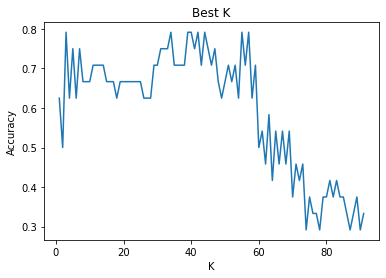

In [14]:
train_full, test_full, trlabels_full, ttlabels_fulls = train_test_split(cancer_data[["Age", "BMI", "Glucose", "Insulin",
                                                                                     "HOMA", "Leptin", "Adiponectin",
                                                                                     "Resistin", "MCP.1"]],
                                                                        cancer_data["Classification"], test_size = 0.2,
                                                                        random_state = 1)

full_data_sup = kneighbors(train_full, trlabels_full, test_full, ttlabels_fulls)

##### Selected data

For the supervised model the only thing missing is to evaluate the precision with the selected columns:
* Glucose
* Insulin
* HOMA
* Resistin

Score: 0.75
Recall: 0.6666666666666666
Accuracy: 0.7083333333333334
Precision: 0.9230769230769231
F1: 0.7741935483870968


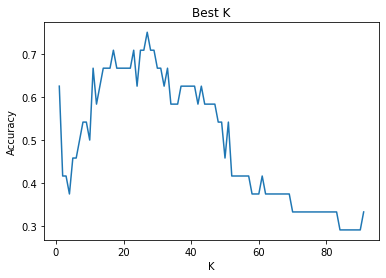

In [15]:
train_subset, test_subset, trlabels_subset, ttlabels_subset = train_test_split(cancer_data[["Glucose", "Insulin", "HOMA",
                                                                                            "Resistin",]],
                                                                        cancer_data["Classification"], test_size = 0.2,
                                                                        random_state = 1)

sel_data_sup = kneighbors(train_subset, trlabels_subset, test_subset, ttlabels_subset)

###### Conclusions on the best data

To say wich data is the best a bar plot will be created comparing both datasets.

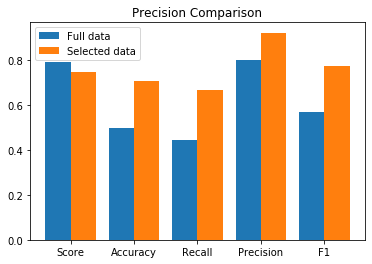

In [17]:
def precision_comparison(data1, data2):
    #first set
    n = 1
    t = 2
    d = 5
    w = 0.8
    x_values1 = [t*element + w*n for element in range(d)]

    #second set
    n = 2
    t = 2
    d = 5
    w = 0.8
    x_values2 = [t*element + w*n for element in range(d)]

    ax = plt.subplot()
    plt.bar(x_values1, data1, label = "Full data")
    plt.bar(x_values2, data2, label = "Selected data")
    plt.legend()
    ax.set_xticks([(x_values1[i] + x_values2[i]) / 2 for i in range(len(x_values1))])
    ax.set_xticklabels(["Score", "Accuracy", "Recall", "Precision", "F1"])
    plt.title("Precision Comparison")
    
precision_comparison(full_data_sup, sel_data_sup)

Even though the `score` is higher for the full data, all the other metrics are higher for the selected variables, giving the impression that not all the variables have a big effect on the prediction.

#### Unsupervised Models

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

def kmeans(data, true_labels):
    model = KMeans(n_clusters = 2, init = "k-means++")
    model.fit(data)
    predictions = model.predict(data)
    precision = metrics.adjusted_rand_score(true_labels, predictions)
    
    return predictions, precision

##### Full Data

In [39]:
full_data_un = kmeans(cancer_data[["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"]],
             cancer_data["Classification"])
print(full_data_un)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0]), -0.008383109167879316)


##### Selected Data

In [40]:
sel_data_un = kmeans(cancer_data[["Glucose", "Insulin", "HOMA", "Resistin",]], cancer_data["Classification"])
print(sel_data_un)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1]), -0.0024587124546047467)
